# K Means Clustering

In [89]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
import pandas as pd 
import numpy as np 
%matplotlib inline

In [90]:
X,y = make_blobs(n_samples = 10000, centers = 3, n_features=2, random_state= 11)

In [91]:
X

array([[ -0.45499274,   0.05429169],
       [ -5.85588884,  -9.53939845],
       [ -2.17069201,   5.14832994],
       ...,
       [ -6.35887037, -11.7271041 ],
       [ -2.61845154,  -1.34189437],
       [  0.08694821,  -1.33584383]], shape=(10000, 2))

In [92]:
y

array([2, 0, 1, ..., 0, 2, 2], shape=(10000,))

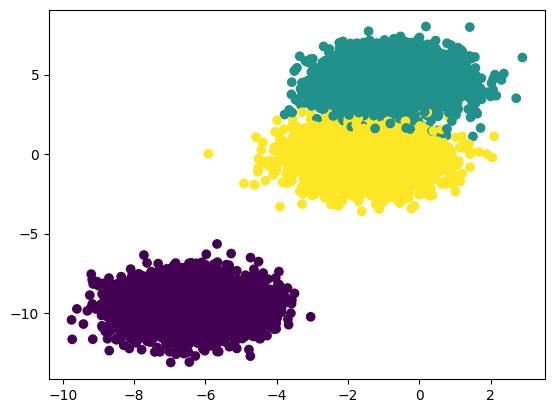

In [93]:
plt.scatter(X[:,0] , X[:,1], c= y)

## Standardization

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=33)

In [96]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [97]:
from sklearn.cluster import KMeans

## Elbow Method to select K value

In [98]:
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters= k, init = "k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [99]:
wcss

[16000.000000000042,
 2318.5937684982005,
 1308.3484597221209,
 1062.727331589149,
 822.0515845415439,
 611.11327365177,
 547.0742707147567,
 492.0020745466161,
 460.560593764181,
 402.9836108608824,
 381.66372394116246,
 352.0661577999181,
 330.712631298946,
 319.565694037668]

Text(0.5, 1.0, 'Elbow Plot')

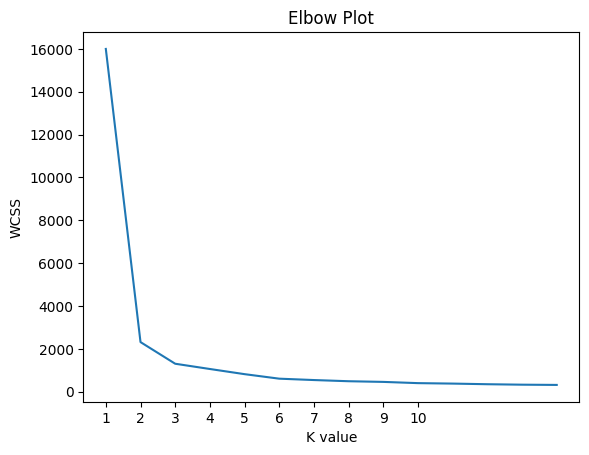

In [100]:
## Plot elbow curve
plt.plot(range(1,15), wcss)
plt.xticks(range(1,11))
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.title("Elbow Plot")

In [101]:
kmeans = KMeans(n_clusters= 3, init = "k-means++")
kmeans.fit_predict(X_train_scaled)

array([2, 2, 2, ..., 2, 1, 0], shape=(8000,), dtype=int32)

In [102]:
y_pred = kmeans.predict(X_test_scaled)

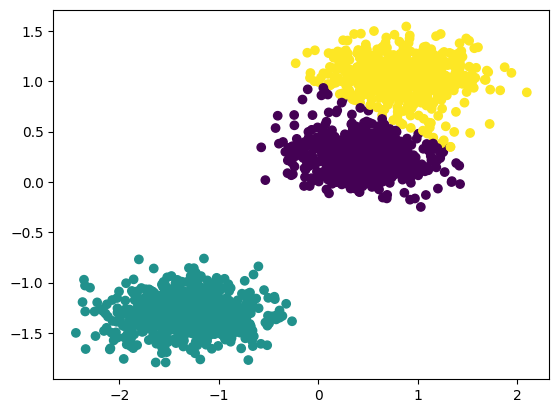

In [103]:
plt.scatter(X_test_scaled[:,0] , X_test_scaled[:,1], c= y_pred)

## Validating the K value

### 1. Knee Locator

In [104]:
from kneed import KneeLocator

In [105]:
kl = KneeLocator(range(1,15) , wcss , curve = "convex" , direction = "decreasing")

In [106]:
kl.elbow

np.int64(2)

### Silhoutte Scoring

In [107]:
from sklearn.metrics import silhouette_score

In [108]:
silhoutte_coefficients = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k , init= "k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled , kmeans.labels_)
    silhoutte_coefficients.append(score)

In [109]:
silhoutte_coefficients

[np.float64(0.7573034166479993),
 np.float64(0.5944314320920935),
 np.float64(0.5531376533138417),
 np.float64(0.439826028092884),
 np.float64(0.43156334952463465),
 np.float64(0.4048824814295189),
 np.float64(0.38666260220443815),
 np.float64(0.367043322526149),
 np.float64(0.37603778948139943),
 np.float64(0.3351917967686673),
 np.float64(0.3212454202599515),
 np.float64(0.32836292231492165),
 np.float64(0.32850955904718737)]

Text(0.5, 1.0, 'Silhoutte Score Plot')

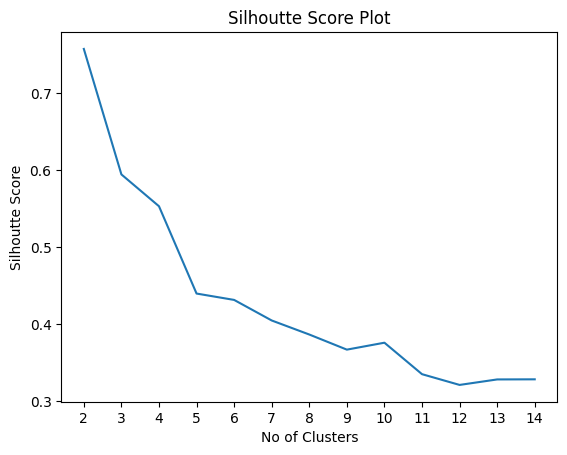

In [110]:
## Plot elbow curve
plt.plot(range(2,15), silhoutte_coefficients)
plt.xticks(range(2,15))
plt.xlabel("No of Clusters")
plt.ylabel("Silhoutte Score")
plt.title("Silhoutte Score Plot")